# 1°) Description Mathématique et Pratique : 

## 1.1°) Comment fonctionne l'algorithme RANSAC ?

Plusieurs utilisations possibles. En partant du plus simple...

#### 1.1.1°) RANSAC Présentation

RANSAC sélectionne uniformément et au hasard un sous-ensemble d'échantillons de données et l'utilise pour estimer les bons paramètres du model. 
Ensuite, il détermine les échantillons qui se situent dans une tolérance d'erreur de la valeur du model généré. Ces échantillons sont considérés comme étant en accord avec le modèle généré et appelés ainsi ensemble consensuel des échantillons de données choisis. Ici, les échantillons consensuels se comportent comme des inliers et le reste sont considérés comme valeurs aberrantes par RANSAC. Si le nombre d’échantillons consensuels est assez élevé il entraîne alors le modèle final sur ces données. Il répète ce processus pendant un nombre k d'itérations et renvoie le modèle qui présente la plus petite erreur moyenne parmi les modèles générés.
En tant qu'algorithme randomisé, RANSAC ne garantit pas de trouver le modèle paramétrique optimal
par rapport aux inliers. Mais la probabilité d’atteindre la solution optimale peut être maintenue
à un niveau minimum de performance en attribuant des valeurs appropriées aux paramètres de l'algorithme.

#### Étapes de RANSAC : 
- <strong>Sélection aléatoire d'un sous-ensemble de points</strong> : À chaque itération, RANSAC sélectionne aléatoirement un sous-ensemble minimal de points de données pour estimer un modèle. Le nombre de points sélectionnés dépend du type de modèle (par exemple, deux points pour une ligne en 2D, trois points pour un cercle, etc.).
</br></br>
- <strong>Estimation du modèle</strong> : Le modèle est ajusté aux points sélectionnés. Le coût de cette étape dépend du modèle spécifique utilisé. Pour une régression linéaire, l'ajustement peut être très rapide, alors que pour des modèles plus complexes, cela peut être plus coûteux.
</br></br>
- <strong>Vérification des inliers</strong> : Une fois le modèle estimé, chaque point de données est vérifié pour voir s'il s'ajuste bien au modèle (inlier) ou non (outlier). Cela implique de calculer la distance de chaque point au modèle et de vérifier s'il est inférieur à un certain seuil.
</br></br>
- <strong>Itérations répétées</strong> : Les étapes ci-dessus sont répétées pour un certain nombre d'itérations, ou jusqu'à ce qu'un modèle suffisamment bon soit trouvé.

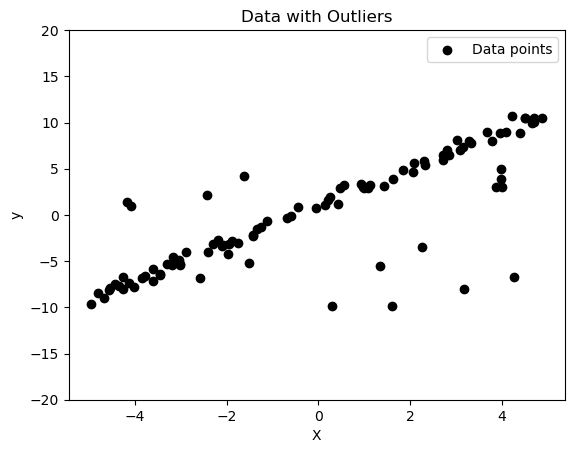

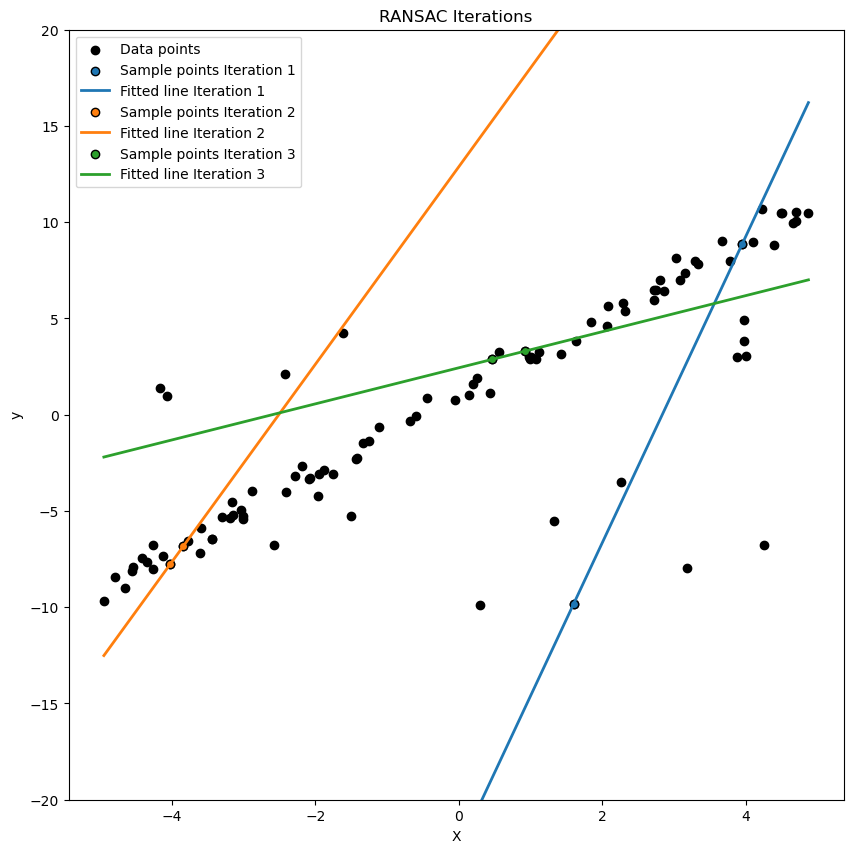

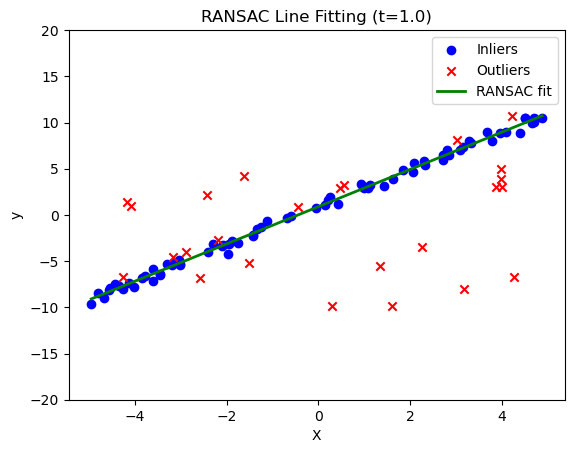

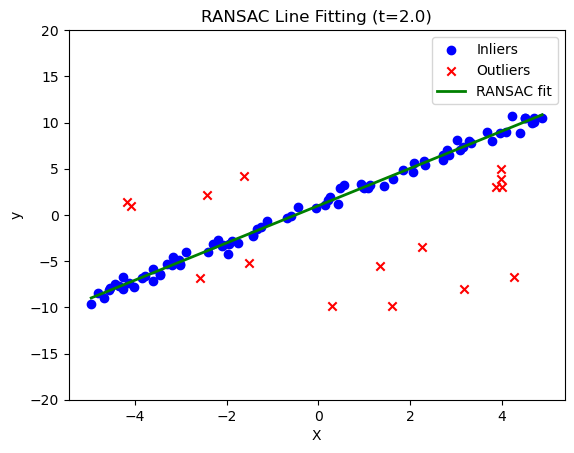

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, RANSACRegressor

# Générer des données 2D avec des outliers
np.random.seed(42)
n_samples = 100
n_outliers = 20

# Génération des points inliers
X_inliers = np.random.uniform(-5, 5, n_samples - n_outliers)
y_inliers = 2 * X_inliers + 1 + np.random.normal(scale=0.5, size=n_samples - n_outliers)

# Génération des points outliers
X_outliers = np.random.uniform(-5, 5, n_outliers)
y_outliers = np.random.uniform(-10, 10, n_outliers)

# Combiner les points inliers et outliers
X = np.concatenate([X_inliers, X_outliers]).reshape(-1, 1)
y = np.concatenate([y_inliers, y_outliers])

# Visualisation des données
plt.scatter(X, y, color='black', label='Data points')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Data with Outliers")
plt.legend()
plt.ylim(-20, 20)
plt.show()

# Fonction pour illustrer les itérations de RANSAC
def illustrate_ransac_iterations(X, y, n_iterations=3):
    np.random.seed(42)
    fig, ax = plt.subplots(figsize=(10, 10))

    ax.scatter(X, y, color='black', label='Data points')

    for i in range(n_iterations):
        # Sélection aléatoire de 2 points pour ajuster une ligne
        sample_indices = np.random.choice(len(X), 2, replace=False)
        X_sample, y_sample = X[sample_indices], y[sample_indices]
        
        # Ajuster une ligne à ces 2 points
        model = LinearRegression().fit(X_sample, y_sample)
        
        # Prédire les y pour toutes les X
        line_X = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
        line_y = model.predict(line_X)
        
        # Visualiser les résultats de l'itération
        ax.scatter(X_sample, y_sample, label=f'Sample points Iteration {i + 1}', edgecolor='k')
        ax.plot(line_X, line_y, label=f'Fitted line Iteration {i + 1}', linewidth=2)

    ax.set_xlabel("X")
    ax.set_ylabel("y")
    ax.legend()
    ax.set_title("RANSAC Iterations")
    ax.set_ylim(-20, 20)  # Définir les limites de l'axe Y
    plt.show()

# Illustrer les itérations de RANSAC
illustrate_ransac_iterations(X, y, n_iterations=3)

# Utilisation de RANSACRegressor pour ajuster une ligne
ransac = RANSACRegressor(LinearRegression(), min_samples=2, residual_threshold=1.0, max_trials=1000)
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Visualisation des résultats
line_X = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
line_y_ransac = ransac.predict(line_X)

plt.scatter(X[inlier_mask], y[inlier_mask], color='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='red', marker='x', label='Outliers')
plt.plot(line_X, line_y_ransac, color='green', linewidth=2, label='RANSAC fit')
plt.xlabel("X")
plt.ylabel("y")
plt.title("RANSAC Line Fitting (t=1.0)")
plt.legend()
plt.ylim(-20, 20)
plt.show()

# Utilisation de RANSACRegressor pour ajuster une deuxième ligne avec un residual_threshold plus élevé
ransac = RANSACRegressor(LinearRegression(), min_samples=2, residual_threshold=2.0, max_trials=1000)
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Visualisation des résultats
line_X = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
line_y_ransac = ransac.predict(line_X)

plt.scatter(X[inlier_mask], y[inlier_mask], color='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='red', marker='x', label='Outliers')
plt.plot(line_X, line_y_ransac, color='green', linewidth=2, label='RANSAC fit')
plt.xlabel("X")
plt.ylabel("y")
plt.title("RANSAC Line Fitting (t=2.0)")
plt.legend()
plt.ylim(-20, 20)
plt.show()


Il est conseillé d'utiliser davantage d'échantillons de données que le sous-ensemble minimal par défault requis (Au moins 2 sous-ensembles dans le cas d'un model linéaire, 3 sous-ensembles dans le cas d'un model circulaire par exemples) car une estimation plus précise du modèle peut être obtenue. 
Bien que l'utilisation de plus d'échantillons augmenterait le temps de calcule pour la sélection du sous-ensemble, il est intéressant d'augmenter la probabilité de trouver le modèle optimal. 
Par conséquent, une augmentation du nombre d’itérations est nécessaire, elle entraîne principalement
une augmentation de la complexité de calcul qui compense les avantages d'avoir un sous-ensemble d’échantillons plus large. 
Voici la relation entre la taille du sous-ensemble d'échantillon et le nombre d'itérations :

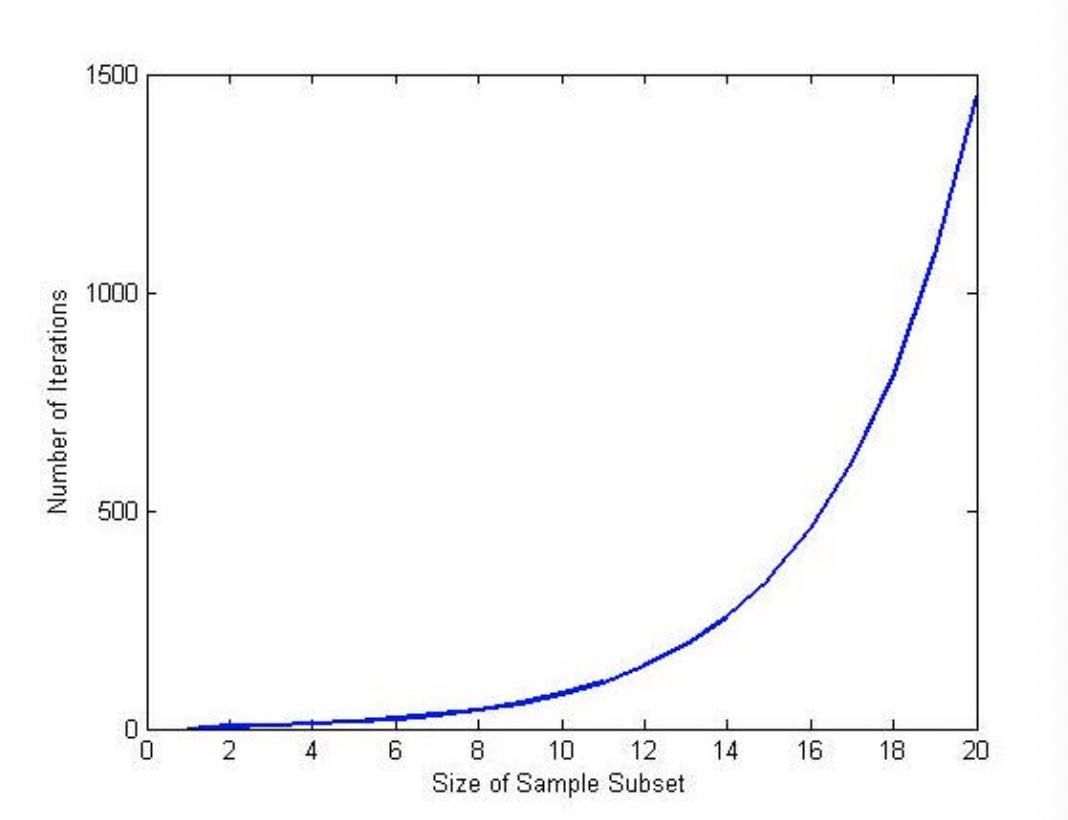

La procédure RANSAC est à l'opposé de celle des techniques de lissage conventionnelles : plutôt que d'utiliser autant de données que possible pour obtenir une solution initiale puis tenter d'éliminer les points de données invalides, RANSAC utilise un ensemble de données initial aussi petit que possible et agrandit cet ensemble avec des données cohérentes lorsque cela est possible. Par exemple, étant donné la tâche d'ajuster un arc de cercle à un ensemble de points bidimensionnels, l'approche RANSAC consisterait à sélectionner un ensemble de trois points (puisque trois points sont nécessaires pour déterminer un cercle), à calculer le centre et le rayon du cercle implicite, et à compter le nombre de points qui sont suffisamment proches de ce cercle pour suggérer leur compatibilité avec celui-ci (c'est-à-dire que leurs écarts sont suffisamment petits pour être considérés comme des erreurs de mesure). S'il y a suffisamment de points compatibles, RANSAC utiliserait une technique de lissage, telle que les moindres carrés, pour calculer une estimation améliorée des paramètres du cercle maintenant qu'un ensemble de points mutuellement cohérents a été identifié.

Ransac est utilisé pour adapter un modèle au pourcentage expérimental d'erreurs brutes et est donc parfaitement adapté à une application dans l'analyse d'images automatisée où l'interprétation est basée sur les données fournies par des détecteurs de caractéristiques sujets aux erreurs (pouvant produire 2 types d'erreurs : Les erreurs de classification et les erreurs de mesures).

## 1.2°) Quels sont ses paramètres ?

In [2]:
class sklearn.linear_model.RANSACRegressor(estimator=None, *, min_samples=None, residual_threshold=None, is_data_valid=None, is_model_valid=None, max_trials=100, max_skips=inf, stop_n_inliers=inf, stop_score=inf, stop_probability=0.99, loss='absolute_error', random_state=None)[source]


SyntaxError: invalid syntax (421671760.py, line 1)

- <strong>estimator</strong> : object, default = None 

Type de Modèle que l'on souhaite utiliser (Regression, Classification, Reduction de dimensionnalité ou Clustering)

- <strong>min_samples</strong> : int (>= 1) or float ([0, 1]), default=None

k = nombre d'itérations => peut être déterminé de la manière suivante :

w = nombre d'inlier dans le jeu de données / nombre de points dans le jeu de données

1-p = (1-w^n)^k

k = log(1-p)\log(1-w^n)

- <strong>residual_threshold</strong> : float, default=None

La valeur seuil pour déterminer quand un point de données correspond à un modèle (t).

- <strong>is_data_valid</strong> : callable, default=None

Ce paramètre vous permet de spécifier une fonction appelable qui détermine si les données d'entrée sont valides pour l'estimateur. Pendant le processus d'ajustement RANSAC, cette fonction est appliquée à chaque sous-ensemble de données.

Le but de cette fonction est de filtrer tous les points de données qui pourraient ne pas convenir à l'ajustement du modèle.

La fonction doit prendre deux arguments :
X : le sous-ensemble de données d'entrée (caractéristiques).
y : les valeurs cibles correspondant au sous-ensemble de données d’entrée.

La fonction doit renvoyer une valeur booléenne indiquant si le sous-ensemble de données est valide (True) ou non (False). Si la fonction renvoie False, le sous-ensemble de données sera exclu du processus d'ajustement RANSAC.
Si is_data_valid est défini sur None (par défaut), tous les points de données sont considérés comme valides et aucun filtrage n'est appliqué.

- <strong>is_model_valid</strong> : callable, default=None

Même principe que pour le paramètre is_data_valid mais appliqué cette fois à un modèle.

- <strong>max_trials</strong> : int, default=100

Nombre maximum d'itérations pour la sélection aléatoire d'un échantillon

- <strong>max_skips</strong> : int, default = np.inf

Nombre maximum d'itérations pouvant être ignorées en raison de l'obtention de zéros inliers ou de données non valides définies par is_data_valid ou de modèles non valides définis par is_model_valid.

- <strong>stop_n_inliers</strong> : int, default=np.inf

Arrêtez l'itération si au moins ce nombre d'inliers est trouvé.

- <strong>stop_score</strong> : in, default = np.inf

L'algorithme RANSAC parcourt une série d'essais, où chaque essai tente d'adapter un modèle à un sous-ensemble de données.
Si, au cours d'une itération, le score du meilleur modèle actuel dépasse le seuil stop_score, l'algorithme arrêtera l'itération et renverra le meilleur modèle actuel.

Le « score » évoqué ici dépend de la fonction de perte choisie pour l'algorithme RANSAC.
Dans RANSAC, le score représente généralement une mesure de l’adéquation du modèle actuel aux données.
Par exemple, si la fonction de perte est l'erreur absolue moyenne (MAE), le score peut représenter l'erreur absolue moyenne des prédictions du modèle sur les inliers.

Par défaut, le paramètre stop_score est défini sur np.inf (infini), ce qui signifie qu'il n'y a pas de seuil spécifique pour le score, et l'algorithme continuera à itérer jusqu'à ce qu'il atteigne d'autres critères d'arrêt tels que le nombre maximum d'essais (max_trials) ou le nombre maximum de sauts (max_skips).

- <strong>stop_probability</strong> : float in range [0, 1], default=0.99

L'itération RANSAC s'arrête si au moins un ensemble de données d'entraînement sans valeurs aberrantes est échantillonné dans RANSAC. Cela nécessite de générer au moins N échantillons (itérations) :

loss =

In [ ]:
random_state =

# 2°) Avantages & Inconvénients

## Avantages
- <span style="color: red;">Robuste contre les Outliers :</span>
</br> Un avantage de RANSAC est sa capacité à effectuer une estimation robuste des paramètres du modèle, c'est-à-dire qu'il peut estimer les paramètres avec un haut degré de précision même lorsqu'un nombre important de valeurs aberrantes sont présentes dans l'ensemble de données. </br></br>
- <span style="color: red;">Modularité et Interprétabilité</span>
</br> Flexibilité du modèle (Modularité 1): RANSAC peut être utilisé avec une variété de modèles d'estimation, comme la régression linéaire, les cercles, les plans, etc. Le modèle de base est interchangeable, ce qui permet d'appliquer RANSAC à différents types de problèmes sans modification majeure de l'algorithme de base.
Facilité d'intégration (Modularité 2): Grâce à cette flexibilité, RANSAC peut être facilement intégré dans différents pipelines d'analyse de données ou de traitement d'image. Par exemple, dans la vision par ordinateur, il peut être utilisé pour la détection de formes géométriques telles que des lignes ou des cercles dans des images bruitées.
</br></br> Phase de sélection (Interprétabilité 1): RANSAC fonctionne en séparant clairement les étapes de sélection de sous-ensembles aléatoires et d'évaluation des modèles. Cette séparation permet de modifier ou d'améliorer chaque étape indépendamment, facilitant ainsi l'expérimentation et l'optimisation.
Phase d'évaluation (Interprétabilité 2): Après la sélection initiale et la création d'un modèle, les points compatibles (inliers) sont identifiés. Cette modularité dans l'évaluation permet d'ajuster les critères d'acceptation des inliers en fonction des besoins spécifiques de l'application.
</br></br> Il est souvent utilisé en vision par ordinateur, par exemple pour résoudre simultanément le problème de correspondance et estimer la matrice fondamentale liée à une paire de caméras stéréo.

## Avantages
- <span style="color: red;">Robuste contre les Outliers :</span>
</br> Un avantage de RANSAC est sa capacité à effectuer une estimation robuste des paramètres du modèle, c'est-à-dire qu'il peut estimer les paramètres avec un haut degré de précision même lorsqu'un nombre important de valeurs aberrantes sont présentes dans l'ensemble de données. </br></br>
- <span style="color: red;">Modularité et Interprétabilité</span>
</br> Flexibilité du modèle (Modularité 1): RANSAC peut être utilisé avec une variété de modèles d'estimation, comme la régression linéaire, les cercles, les plans, etc. Le modèle de base est interchangeable, ce qui permet d'appliquer RANSAC à différents types de problèmes sans modification majeure de l'algorithme de base.
Facilité d'intégration (Modularité 2): Grâce à cette flexibilité, RANSAC peut être facilement intégré dans différents pipelines d'analyse de données ou de traitement d'image. Par exemple, dans la vision par ordinateur, il peut être utilisé pour la détection de formes géométriques telles que des lignes ou des cercles dans des images bruitées.
</br></br> Phase de sélection (Interprétabilité 1): RANSAC fonctionne en séparant clairement les étapes de sélection de sous-ensembles aléatoires et d'évaluation des modèles. Cette séparation permet de modifier ou d'améliorer chaque étape indépendamment, facilitant ainsi l'expérimentation et l'optimisation.
Phase d'évaluation (Interprétabilité 2): Après la sélection initiale et la création d'un modèle, les points compatibles (inliers) sont identifiés. Cette modularité dans l'évaluation permet d'ajuster les critères d'acceptation des inliers en fonction des besoins spécifiques de l'application.
</br></br> Il est souvent utilisé en vision par ordinateur, par exemple pour résoudre simultanément le problème de correspondance et estimer la matrice fondamentale liée à une paire de caméras stéréo.

## Complexité Algorithmique

- <strong>Sélection aléatoire</strong> : </br>
La sélection de points est généralement considérée comme O(1) pour chaque itération, car il s'agit simplement de choisir quelques points au hasard.

- <strong>Estimation du modèle</strong> : </br>
La complexité de cette étape dépend du modèle. Pour une régression linéaire, l'estimation est O(1), mais pour des modèles plus complexes, cela peut être O(m), où m est le nombre de points dans le sous-ensemble.

- <strong>Vérification des inliers</strong> : </br>
Cette étape implique de vérifier chaque point de données par rapport au modèle. Si nous avons n points de données, cela prend O(n) par itération.

- <strong>Nombre d'itérations (k)</strong> : </br>
Le nombre d'itérations requis pour assurer une probabilité suffisante de trouver un bon modèle dépend du pourcentage de inliers et de la taille du sous-ensemble utilisé pour estimer le modèle. Le nombre d'itérations est souvent fixé à une valeur prédéfinie ou déterminée dynamiquement. En général, k est considéré comme un paramètre de l'algorithme.

La complexité totale de l'algorithme RANSAC peut être approximée par :

O
(
𝑘
⋅
(
𝑚
+
𝑛
)
)

où :

𝑘 est le nombre d'itérations, </br>
𝑚 est la complexité de l'estimation du modèle (généralement constante pour des modèles simples comme la régression linéaire), </br>
𝑛 est le nombre de points de données.

## Métrique d'évaluation

# 3°) Exemples

- Datasets avec beaucoup d'outliers

- Computer Vision

# 4°) Démonstration

## 4.1°) Estimation robuste de modèle linéaire en utilisant RANSAC

Dans cet exemple, nous voyons comment ajuster de manière robuste un modèle linéaire à des données défectueuses en utilisant l'algorithme RANSAC.

Le régresseur linéaire classique est sensible aux valeurs aberrantes, et la ligne ajustée peut facilement être déviée de la véritable relation sous-jacente des données.

Le régresseur RANSAC divise automatiquement les données en inliers et en outliers, et la ligne ajustée est déterminée uniquement par les inliers identifiés.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import datasets, linear_model

n_samples = 1000
n_outliers = 50

In [ ]:
X, y, coef = datasets.make_regression(
    n_samples=n_samples,
    n_features=1,
    n_informative=1,
    noise=10,
    coef=True,
    random_state=0,
)

In [ ]:
# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

In [ ]:
# Fit linear_model line using all data
lr = linear_model.LinearRegression()
lr.fit(X, y)

In [ ]:
# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [ ]:
# Predict data of estimated models
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)

In [ ]:
# Compare estimated coefficients
print("Estimated coefficients (true, linear regression, RANSAC):")
print(coef, lr.coef_, ransac.estimator_.coef_)

In [ ]:
lw = 2
plt.scatter(
    X[inlier_mask], y[inlier_mask], color="yellowgreen", marker=".", label="Inliers"
)
plt.scatter(
    X[outlier_mask], y[outlier_mask], color="gold", marker=".", label="Outliers"
)
plt.plot(line_X, line_y, color="navy", linewidth=lw, label="Linear regressor")
plt.legend(loc="lower right")
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()

In [ ]:
lw = 2
plt.scatter(
    X[inlier_mask], y[inlier_mask], color="yellowgreen", marker=".", label="Inliers"
)
plt.scatter(
    X[outlier_mask], y[outlier_mask], color="gold", marker=".", label="Outliers"
)
plt.plot(line_X, line_y, color="navy", linewidth=lw, label="Linear regressor")
plt.plot(
    line_X,
    line_y_ransac,
    color="cornflowerblue",
    linewidth=lw,
    label="RANSAC regressor",
)
plt.legend(loc="lower right")
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()

#### Matrice de corrélation

#### Méthode d'optimisation

#### Train / Test

#### Amélioration des données possible via le scaling

#### Courbes d'apprentissages

#### Les variantes : Ridge & Lasso => Régularisation

## 4.2°) Analyse d'image assisté par ordinateur en utilisant RANSAC

# 5°) Ressources

[1] [M.A. Fischler and R.C. Bolles. Random sample consensus: A paradigm for model
fitting with applications to image analysis and automated cartography. Communications of the ACM, 24(6):381–395, 1981.](https://dl.acm.org/doi/epdf/10.1145/358669.358692)

[2] [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html)

In [ ]:
[3] [Wikipédia](https://en.wikipedia.org/wiki/Random_sample_consensus)

In [ ]:
[4] [RANSAC](https://helios2.mi.parisdescartes.fr/~lomn/Cours/CV/SeqVideo/Material/RANSAC-tutorial.pdf)